In [7]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, random
random.seed(29)

In [8]:
random.seed(29)

def random_photo_per_class(path):
    random_images = []
    for root, dirs, files in os.walk(path):
        if root[-5:] != "train":
            image = random.choice(os.listdir("{}".format(root)))
            random_images.append(str(root)+os.sep+str(image))
    return random_images

random_photo_per_class("C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train")

['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train\\advertisement\\502599496.tif',
 'C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train\\budget\\01002455_01002458.tif',
 'C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train\\email\\2080691429.tif',
 'C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train\\file folder\\2063260041.tif',
 'C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train\\form\\518772453+-2500.tif',
 'C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train\\handwritten\\517725964+-5970.tif',
 'C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train\\invoice\\2028721166.tif',
 'C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train\\letter\\0060234651.tif',
 'C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train\\memo\\2028516

In [9]:
examples = random_photo_per_class("C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train")

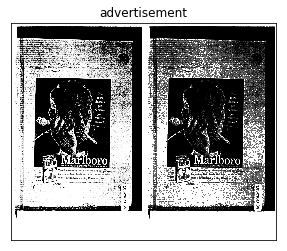

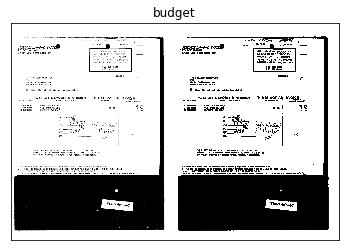

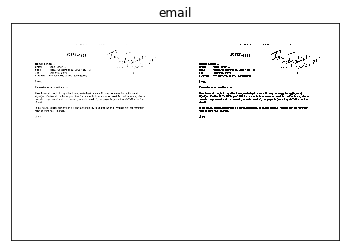

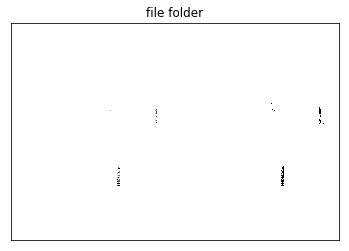

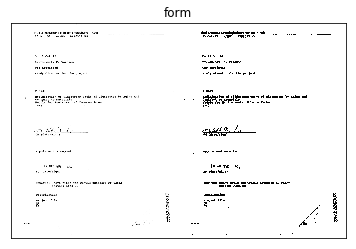

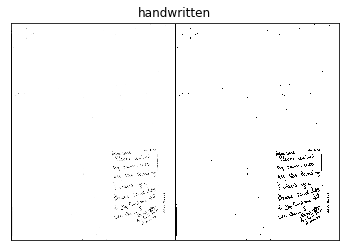

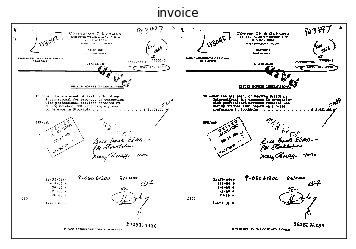

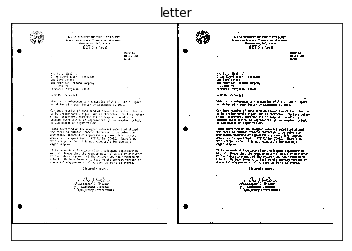

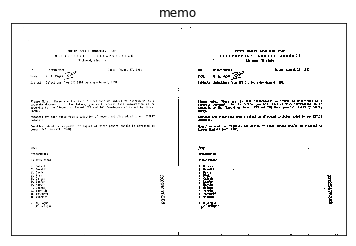

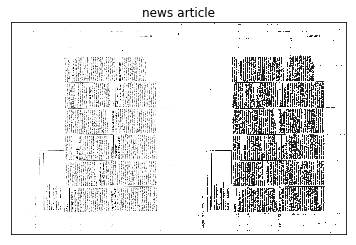

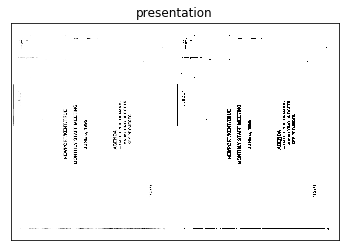

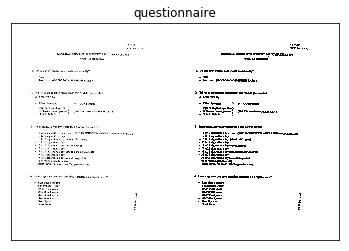

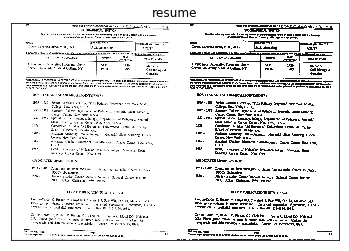

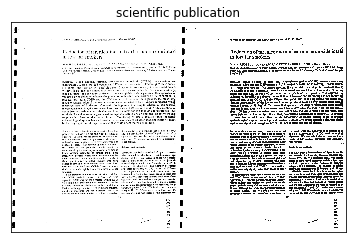

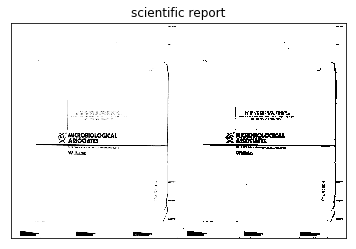

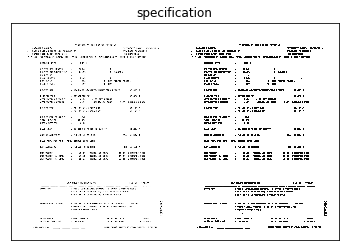

In [10]:
for image in examples:
    directory = os.path.dirname(image)
    doctype = directory.rsplit('\\', 1)[-1]
    img = cv2.imread(image, 0)

    equ = cv2.equalizeHist(img)
    res = np.hstack((img,equ))
    
    plt.subplot(111)
    plt.imshow(res, cmap='Greys_r')
    plt.title('{}'.format(doctype))
    plt.xticks([])
    plt.yticks([])

    plt.show()
    
    
    #np.histogram(1d array of img values, 256 bins between range 0 and 255, inclusive), returns histogram values and bin edges


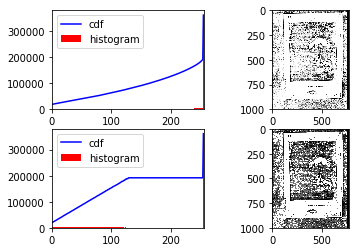

256
256


In [11]:
#### Hard Coding Histogram Equalization with Code from OpenCV ####

img = cv2.imread('C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train/advertisement/502599496.tif',0)

#get histogram (count of each value) values and bin edges for all pixel values
hist,bins = np.histogram(img.flatten(),256,[0,256])

#cumulative sum to get cumulative distribution function
cdf = hist.cumsum()
#Normalize cdf by multiplying by most common pixel value divided by sum of pixel values
cdf_normalized = cdf * hist.max()/ cdf.max()


cdf_m = np.ma.masked_equal(cdf,0)
#min-max normalizing to [0,255] range
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]

hist2,bins2 = np.histogram(img2.flatten(),256,[0,256])

cdf2 = hist2.cumsum()
cdf_normalized2 = cdf2 * hist2.max()/ cdf2.max()

plt.subplot(221)
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')

plt.subplot(222)
plt.imshow(img, cmap='Greys_r')

plt.subplot(223)
plt.plot(cdf_normalized2, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')

plt.subplot(224)
plt.imshow(img2, cmap='Greys_r')

plt.show()
print(len(cdf))
print(len(cdf_m))

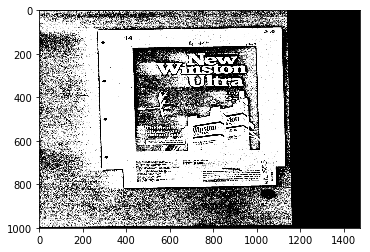

In [12]:
image = cv2.imread("C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/test/advertisement/502607274+-7274.tif", 0)

plt.imshow(image, cmap='gray')
plt.show()


In [13]:
height, width = img.shape

In [ ]:
header = img[0:(int(height*0.33)), 0:width]
footer = img[int(height*0.67):height, 0:width]
lbody = img[int(height*0.33):int(height*0.67), 0:int(width*0.5)]
rbody = img[int(height*0.33):int(height*0.67), int(width*0.5):width]
center = img[int(height*0.33):int(height*0.67), int(width*0.25):int(width*0.75)]

In [ ]:
plt.imshow(img, cmap = "gray")
plt.show()
plt.imshow(header, cmap = "gray")
plt.show()
plt.imshow(lbody, cmap = "gray")
plt.show()
plt.imshow(rbody, cmap = "gray")
plt.show()
plt.imshow(footer, cmap = "gray")
plt.show()
plt.imshow(center, cmap = "gray")
plt.show()

In [ ]:
### Create train/test/valid datasets for each region####
### Later not used ####

def create_regions(folder, dataset):
    image_paths = []
    for root, dirs, files in os.walk(folder):
        for file in files:
            image_paths.append(str(root)+os.sep+str(file))
            
            
    path = 'C:/Users/sjcrum/Documents/Machine Learning II/Final Project/RegionalImages/{}/'.format(dataset)
    print(path)
    regions = ['whole', 'header', 'footer', 'left_body', 'right_body']
    classes = {'letter': '0', 'form': '1', 'email': '2', 'handwritten': '3', 'advertisement': '4', 'scientific report': '5', 
       'scientific publication': '6', 'specification': '7', 'file folder': '8', 'news article': '9', 'budget': '10', 
       'invoice': '11', 'presentation': '12', 'questionnaire': '13', 'resume': '14', 'memo': '15'}
    
    for region in regions:
        new_path = path + region
        if not os.path.exists(new_path):
            os.makedirs(new_path)
        for cl in classes.keys():
            class_path = new_path + '/' + cl
            if not os.path.exists(class_path):
                os.makedirs(class_path)
    
    for image in image_paths:
        img = cv2.imread(image,0)
        height = img.shape[0]
        width = img.shape[1]  
        split_im = image.split('\\', 1)
        print(split_im)
        cv2.imwrite('{}/whole/{}'.format(path, split_im[1]), img)
        header = img[0:(int(height*0.33)), 0:width]
        cv2.imwrite('{}/header/{}'.format(path, split_im[1]), header)
        footer = img[int(height*0.67):height, 0:width]
        cv2.imwrite('{}/footer/{}'.format(path, split_im[1]), footer)
        left_body = img[int(height*0.33):int(height*0.67), 0:int(width*0.5)]
        cv2.imwrite('{}/left_body/{}'.format(path, split_im[1]), left_body)
        right_body = img[int(height*0.33):int(height*0.67), int(width*0.5):width]
        cv2.imwrite('{}/right_body/{}'.format(path, split_im[1]), right_body)

create_regions("C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train", "train")
create_regions("C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/valid", "valid")

C:/Users/sjcrum/Documents/Machine Learning II/Final Project/RegionalImages/train/
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\0000015980.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\0000038215.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\0000044046.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\0000044055.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\0000092124.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\0000102484.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\0000110511.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advert

['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\0013006110.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\0030048079.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\0030048101.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\0030048142.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\0030048434.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\0030048603.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\0030048610.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\0030048637.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Pr

['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\03326244.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\03328215.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\03333793.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\03333795.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\03367227.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\03541596.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\03553588.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\03554980.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentIm

['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\1002761013.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\1002761047.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\1002761050.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\1002761055.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\1002761068.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\1002761150.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\1002761164.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\1002761183.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Pr

['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\13015247.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\13015274.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\13015302.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\13025280.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\13030434.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\13030452.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\13030485.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\13031293.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentIm

['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2040646973.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2040752006.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2040790428.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2040817680.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2040817965.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2040818052.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2040848391.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2040871723.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Pr

['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2043982901.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2043982906.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2044128297.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2044131394.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2044194169.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2044194178.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2044194221.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2044195286.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Pr

['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2049257287.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2049259921.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2049260451.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2049323044.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2049323047.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2049348238.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2049408971.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2049477736.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Pr

['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2061000633.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2061000639.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2061000644.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2061000704_2061000708.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2061000722_2061000723.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2061000780.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2061000959.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2061001437.tif']
['C:/Users/sjcrum/Documents/Machin

['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2063678009.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2063687033.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2063688266.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2063688370.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2063688828.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2063693835.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2063737965.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2063810365.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Pr

['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2070501595.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2070501624_1625.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2070513784_3791a.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2070514443_4444.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2070572196.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2070584565.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2070691478.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2070706119.tif']
['C:/Users/sjcrum/Documents/Machine Lear

['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2071466750_6751.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2071466759_6760.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2071466983_6984.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2071512164.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2071524934.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2071524960.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2071537481.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\2071580620.tif']
['C:/Users/sjcrum/Documents/Machine Learn

['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\500057626+-7626.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\500108750+-8753.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\500111448_500111452.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\500116425+-6427.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\500156115_500156118.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\500161107.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\500161281.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\500161315.tif']
['C:/Users/sjcrum/Document

['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\501782785.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\501813882+-3883.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\501833121+-3124.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\501833450+-3453.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\501921401+-1401.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\501947791.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\501947814.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\501947978.tif']
['C:/Users/sjcrum/Documents/Machine Lear

['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502471661.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502471796.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502471840.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502471850.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502472384.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502472469.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502472514.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502472661.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/Do

['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502593453.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502593503.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502593638.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502593700_502593700a.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502593737.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502593881.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502594033.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502594293.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final

['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502598958.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502599112.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502599253.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502599295.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502599321.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502599483.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502599496.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502599604+-9604.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Proj

['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502612538+-2538.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502612653a-2654.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502612677a-2678.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502612698a-2699.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502612854a-2854a.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502613009+-3009.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502613184a-3185.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\502613194a-3195.tif']
['C:/Users/sjcr

['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\503783127+-3127.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\503943755.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\503943916.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\503943964.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\503944200.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\503944529+-4529.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\503950013.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\503950134.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Fina

['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\506888246.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\506940153.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\506940324_506940325.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\506940337.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\506940498.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\507110641+-0641.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\507144016+-4016.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\507144111+-4111.tif']
['C:/Users/sjcrum/Documents/Machine 

['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\509133624+-3624.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\509133664+-3664.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\509133798.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\509133826.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\509134000+-4001.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\509134116.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\509134217.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\509134254_509134255.tif']
['C:/Users/sjcrum/Documents/Machine 

['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\514134177+-4178.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\514134212+-4213.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\514134281+-4282.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\514154928+-4951.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\514166189_514166190.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\514181938+-1939.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\514182179+-2180.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\514182273+-2274.tif']
['C:/Users/s

['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\517505058+-5059.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\517505067+-5067.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\517505076+-5077.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\517505084+-5085.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\517505088+-5088.tif']
['C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train', 'advertisement\\517505099+-5102.tif']


In [ ]:
path = 'C:/Users/sjcrum/Documents/Machine Learning II/Final Project/RegionalImages/'
regions = ['whole', 'header', 'footer', 'left_body', 'right_body']
for region in regions:
    new_path = path + region
    if not os.path.exists(new_path):
        os.makedirs(new_path)

In [ ]:
path = 'C:/Users/sjcrum/Documents/Machine Learning II/Final Project/RegionalImages/valid'
def make_regional_folders(path):
    
    regions = ['whole', 'header', 'footer', 'left_body', 'right_body']
    
    classes = {'letter': '0', 'form': '1', 'email': '2', 'handwritten': '3', 'advertisement': '4', 'scientific report': '5', 
       'scientific publication': '6', 'specification': '7', 'file folder': '8', 'news article': '9', 'budget': '10', 
       'invoice': '11', 'presentation': '12', 'questionnaire': '13', 'resume': '14', 'memo': '15'}    

    for region in regions:
        path = 'C:/Users/sjcrum/Documents/Machine Learning II/Final Project/RegionSubset/valid/{}'.format(region)
        if not os.path.exists(path):
            os.makedirs(path)
        for i in list(classes.keys()):
            path = 'C:/Users/sjcrum/Documents/Machine Learning II/Final Project/RegionSubset/valid/{}/{}'.format(region, i)
            if not os.path.exists(path):
                os.makedirs(path)

make_regional_folders(path)


In [ ]:
def subset_regional(path):
    images = []
    for root, dirs, files in os.walk(path):
        for file in files:
            images.append(str(root)+os.sep+str(file))
    random.shuffle(images)
    print(len(images))
    sub_images = images[:int(0.25 * len(images))]
    print(len(sub_images))
    for im in images:
        img = im.split("RegionalImages")
        print(img)
        #os.rename('')
        
        
subset_regional('C:/Users/sjcrum/Documents/Machine Learning II/Final Project/RegionalImages/valid/header/budget')    